In [1]:
from SLIM.slim_bpr import slim_bpr
from utils.evaluator.evaluator import evaluator
from utils.submission_helper import submission_helper
from utils.data_manager.data_manager import data_manager
from utils.data_manager.splitter import splitter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
training, validation, test = splitter().get_train_evaluation_test(percentage_of_training_data=0.6,
                                                                  percentage_of_validation_data=0.2)

In [3]:
k_vector = [k for k in range(10,500,20)]
map_vector = []
for k in k_vector:
    recommender = slim_bpr()
    recommender.fit(training_set=training, k=k, epochs=10)
    map_vector.append(evaluator.evaluate_already_trained(recommender=recommender)[2])

Recommender_Base_Class: URM Detected 461 (5.80 %) cold users.
Recommender_Base_Class: URM Detected 5495 (21.15 %) cold items.
Processed 0 ( 0.00% ) in 0.0010 seconds
Processed 5000 ( 8.28% ) in 1.6407 seconds
Processed 10000 ( 16.55% ) in 1.6651 seconds
Processed 15000 ( 24.83% ) in 1.6083 seconds
Processed 20000 ( 33.11% ) in 1.5737 seconds
Processed 25000 ( 41.38% ) in 1.7112 seconds
Processed 30000 ( 49.66% ) in 1.6280 seconds
Processed 35000 ( 57.94% ) in 1.6436 seconds
Processed 40000 ( 66.22% ) in 1.6116 seconds
Processed 45000 ( 74.49% ) in 1.5790 seconds
Processed 50000 ( 82.77% ) in 1.6500 seconds
Processed 55000 ( 91.05% ) in 1.6175 seconds
Processed 60000 ( 99.32% ) in 1.5605 seconds
Epoch 1 of 10 complete in 0.33 minutes
Processed 0 ( 0.00% ) in 0.0000 seconds
Processed 5000 ( 8.28% ) in 1.6047 seconds
Processed 10000 ( 16.55% ) in 1.5876 seconds
Processed 15000 ( 24.83% ) in 1.5919 seconds
Processed 20000 ( 33.11% ) in 1.5435 seconds
Processed 25000 ( 41.38% ) in 1.6220 se

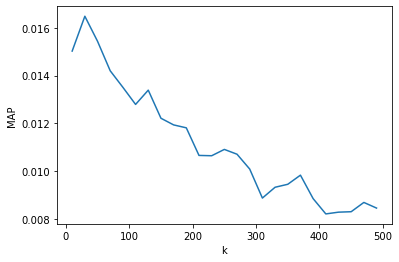

In [4]:
plt.plot(k_vector,map_vector)
plt.ylabel('MAP')
plt.xlabel('k')
plt.show()

In [8]:
k_chosen = k_vector[np.argmax(map_vector)]
k_chosen

30

In [11]:
map_last_value = None
current_map = None
map_vector = []
epochs = [i for i in range(5, 100, 10)]
last_recommender = None
for epoch in epochs:
    slim_recommender = slim_bpr()
    slim_recommender.fit(training_set=training, epochs=epoch, k=30)
    current_map = evaluator.evaluate_already_trained(recommender=slim_recommender)[2]
    map_vector.append(current_map)
    if map_last_value is not None and map_last_value >current_map:
        break
    map_last_value = current_map
    last_recommender=slim_recommender

Recommender_Base_Class: URM Detected 461 (5.80 %) cold users.
Recommender_Base_Class: URM Detected 5495 (21.15 %) cold items.
Processed 0 ( 0.00% ) in 0.0010 seconds
Processed 5000 ( 8.28% ) in 1.6840 seconds
Processed 10000 ( 16.55% ) in 1.6820 seconds
Processed 15000 ( 24.83% ) in 1.6502 seconds
Processed 20000 ( 33.11% ) in 1.7320 seconds
Processed 25000 ( 41.38% ) in 1.7590 seconds
Processed 30000 ( 49.66% ) in 1.7530 seconds
Processed 35000 ( 57.94% ) in 1.6730 seconds
Processed 40000 ( 66.22% ) in 1.7350 seconds
Processed 45000 ( 74.49% ) in 1.7180 seconds
Processed 50000 ( 82.77% ) in 1.7220 seconds
Processed 55000 ( 91.05% ) in 1.7650 seconds
Processed 60000 ( 99.32% ) in 1.7070 seconds
Epoch 1 of 5 complete in 0.35 minutes
Processed 0 ( 0.00% ) in 0.0000 seconds
Processed 5000 ( 8.28% ) in 1.7180 seconds
Processed 10000 ( 16.55% ) in 1.7730 seconds
Processed 15000 ( 24.83% ) in 1.6960 seconds
Processed 20000 ( 33.11% ) in 1.6620 seconds
Processed 25000 ( 41.38% ) in 1.7130 sec

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

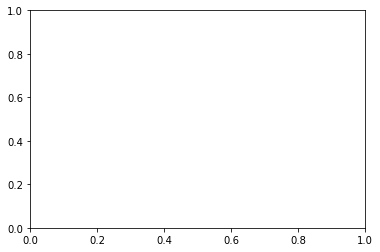

In [12]:
plt.plot(epochs,map_vector)
plt.ylabel('MAP')
plt.xlabel('epoch')
plt.show()


In [15]:
slim_recommender = slim_bpr()
slim_recommender.fit(training_set=data_manager().get_urm(),
                     epochs=50, k=30)
submission_helper(name_of_the_file="first_slim",
                  recommender=slim_recommender).build_submission()


Recommender_Base_Class: URM Detected 1079 (4.15 %) cold items.
Processed 0 ( 0.00% ) in 0.0010 seconds
Processed 5000 ( 4.41% ) in 1.8690 seconds
Processed 10000 ( 8.83% ) in 1.8340 seconds
Processed 15000 ( 13.24% ) in 1.8830 seconds
Processed 20000 ( 17.66% ) in 1.9465 seconds
Processed 25000 ( 22.07% ) in 1.8730 seconds
Processed 30000 ( 26.49% ) in 1.9790 seconds
Processed 35000 ( 30.90% ) in 1.8874 seconds
Processed 40000 ( 35.31% ) in 1.8559 seconds
Processed 45000 ( 39.73% ) in 1.9837 seconds
Processed 50000 ( 44.14% ) in 1.9850 seconds
Processed 55000 ( 48.56% ) in 1.9490 seconds
Processed 60000 ( 52.97% ) in 2.0240 seconds
Processed 65000 ( 57.39% ) in 2.0080 seconds
Processed 70000 ( 61.80% ) in 1.9281 seconds
Processed 75000 ( 66.21% ) in 1.9790 seconds
Processed 80000 ( 70.63% ) in 1.9580 seconds
Processed 85000 ( 75.04% ) in 1.9730 seconds
Processed 90000 ( 79.46% ) in 1.9070 seconds
Processed 95000 ( 83.87% ) in 1.8760 seconds
Processed 100000 ( 88.29% ) in 1.9610 seconds